In [1]:
pwd

'/Users/shreyasi'

In [2]:
cd data301


/Users/shreyasi/data301


In [3]:
cd course-project-group_6001


/Users/shreyasi/data301/course-project-group_6001


In [4]:
cd analysis 

/Users/shreyasi/data301/course-project-group_6001/analysis


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("adult.csv")
df

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,annual-salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


**Research Question: Race distribution in adults with annual salary above and below 50K**

*[State unemployment by race and ethnicity](https://www.epi.org/indicators/state-unemployment-race-ethnicity/)*

In [6]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              32561 non-null  int64 
 1    workclass       32561 non-null  object
 2    fnlwgt          32561 non-null  int64 
 3    education       32561 non-null  object
 4    education-num   32561 non-null  int64 
 5    marital-status  32561 non-null  object
 6    occupation      32561 non-null  object
 7    relationship    32561 non-null  object
 8    race            32561 non-null  object
 9    sex             32561 non-null  object
 10   capital-gain    32561 non-null  int64 
 11   capital-loss    32561 non-null  int64 
 12   hours-per-week  32561 non-null  int64 
 13   native-country  32561 non-null  object
 14   annual-salary   32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


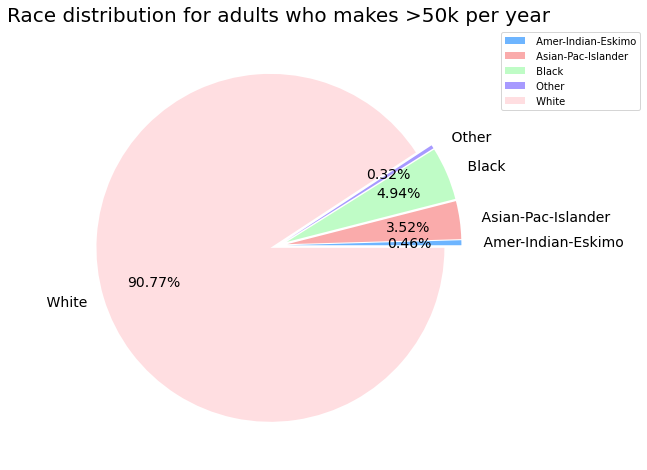

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv("adult.csv") #load the file

cols = ["age", "workclass", "fnlwgt", "education", "education-num", "marital-status", "occupation", "relationship", "race", "sex", "capital-gain",
           "capital-loss", "hours-per-week", "native-country", "annualsalary"] 

df = pd.DataFrame(data = np.array(data), columns=cols)

colors = ['#6eb5ff','#faabab','#bffcc6','#a79aff','#ffdee1']


df_GT50k = df[df["annualsalary"] == " >50K"] #adults that make more than 50K annually 

temp1 = df_GT50k.groupby("race")["race"].count()


pie, ax1 = plt.subplots(figsize=[10,8])

labels = temp1.keys()

plt.pie(x=temp1, autopct="%1.2f%%", explode=[0.05]*len(temp1), labels=labels, colors=colors, pctdistance=0.7, textprops={'fontsize': 14})

plt.title("Race distribution for adults who makes >50k per year", fontsize=20)
ax1.legend(loc='center left', bbox_to_anchor=(1, 0.9))

pie.savefig("moreThan50kPieChart.png")

**This chart visualizes the race distribution for adults whose annual income is above 50k dollars per year**

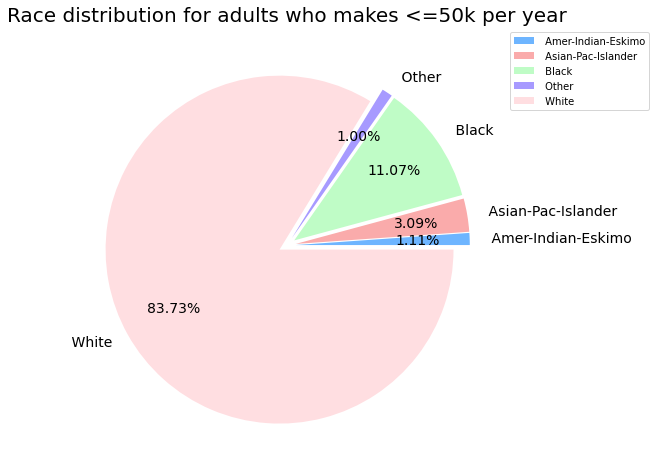

In [9]:
df_LT50k = df[df["annualsalary"] == " <=50K"]
temp2 = df_LT50k.groupby("race")["race"].count()

pie, ax2 = plt.subplots(figsize=[10,8])
labels = temp2.keys()
plt.pie(x=temp2, autopct="%.2f%%", explode=[0.05]*len(temp2), labels=labels, colors=colors, pctdistance=0.7, textprops={'fontsize': 14})
plt.title("Race distribution for adults who makes <=50k per year", fontsize=20)
ax2.legend(loc='center left', bbox_to_anchor=(1, 0.9))


pie.savefig("lessThan50kPieChart.png")


**This chart visualizes the race distribution for adults whose annual income is below50k dollars per year**

**As we can see from the plots above, the major chunk of adults who make more and less than 50K annually are White. 
It is very interesting because besides showing the race distribution this plot also shows that there aremore white people are employed across the globe than all other races combined.**

As we can see from the plots above, the major chunk of adults who make more and less than 50K annually are White. It is very interesting because besides showing the race distribution this plot also shows that there aremore white people are employed across the globe than all other races combined. 